In [1]:
!pip install pandas numpy matplotlib seaborn plotly plotly_express plotly.graph_objects

ERROR: Could not find a version that satisfies the requirement plotly.graph_objects (from versions: none)
ERROR: No matching distribution found for plotly.graph_objects


In [2]:
#Esenciales para data
import pandas as pd
import numpy as np 

#Esenciales para graficar
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go


In [3]:
#configuracion grafica
plt.style.use('seaborn-v0_8-whitegrid') #Estilo de las graficas matplotlib
sns.set_style("whitegrid") #Estilo de las graficas seaborn
plt.rcParams['figure.figsize'] = (12,4) #Tamaño del titulo de los ejes

In [5]:
df = pd.read_csv(r'C:\Users\Usuario\Documents\GitHub\TITANIC\Data\titanic_limpio.csv')

In [6]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Tiene cabina
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Sin datos,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1


#### Matplotlib 

#### CUÁNDO USAR: Gráficos de barras son ideales para comparar cantidades entre categorías discretas.

In [7]:
# Crear una variable espeficifica que contenga la informacion que queremos en un nuestro grafico
supervientes_por_clase = df.groupby('Pclass')['Survived'].mean() *100

In [8]:
supervientes_por_clase

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

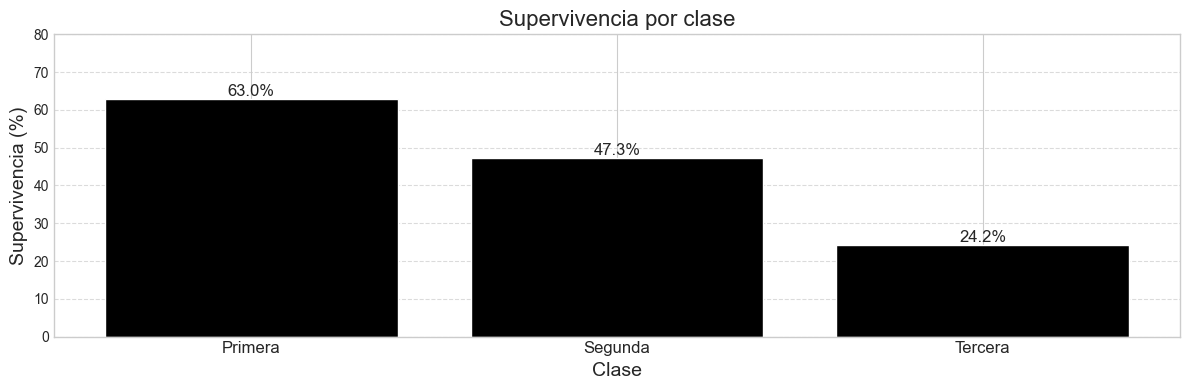

In [9]:
plt.figure(figsize=(12,4))
#crea el grafico de barras
bars = plt.bar(supervientes_por_clase.index, supervientes_por_clase.values, color = 'black')
#añadir etiquetas a las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.1f}%', ha='center', va='bottom', fontsize=12)
#añadir etiquetas y titulos
plt.title('Supervivencia por clase', fontsize=16)
plt.xlabel('Clase', fontsize=14)
plt.ylabel('Supervivencia (%)', fontsize=14)
plt.xticks(supervientes_por_clase.index, ['Primera', 'Segunda', 'Tercera'], fontsize=12)
plt.ylim(0, 80)
#anadimos una cuadricula 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() #ajustar el grafico
plt.show() #mostrar el grafico

### histogramas 
#### Los histogramas son ideales para visualizar la distribución de variables numéricas continuas

In [10]:
df2 = pd.read_csv(r'C:\Users\Usuario\Documents\GitHub\TITANIC\Data\titanic.csv')

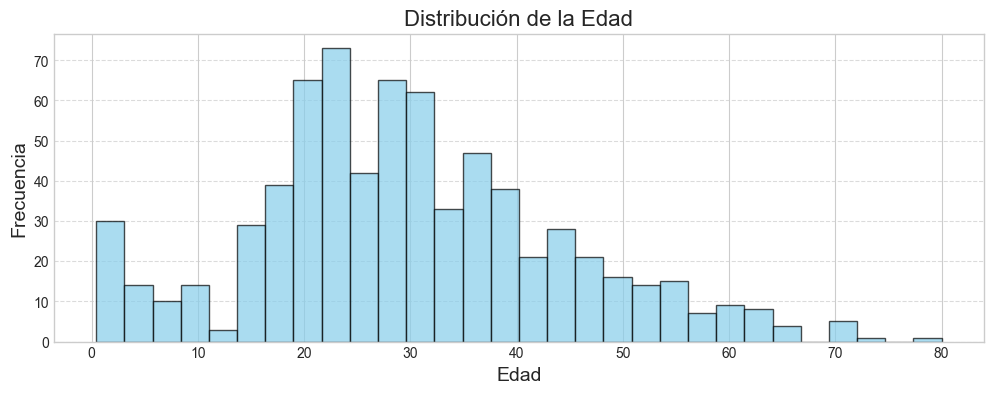

In [11]:
### hist plost (histograma)
plt.figure(figsize=(12,4))
edad = df2['Age'].dropna()  # Eliminar valores NaN de la columna 'Age'
n, bins, patches = plt.hist(edad, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribución de la Edad', fontsize=16)
plt.xlabel('Edad', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show() #mostrar el grafico

### Diagrama de dispersión

#### Los diagramas de dispersión son perfectos para mostrar la relación entre dos variables numéricas.

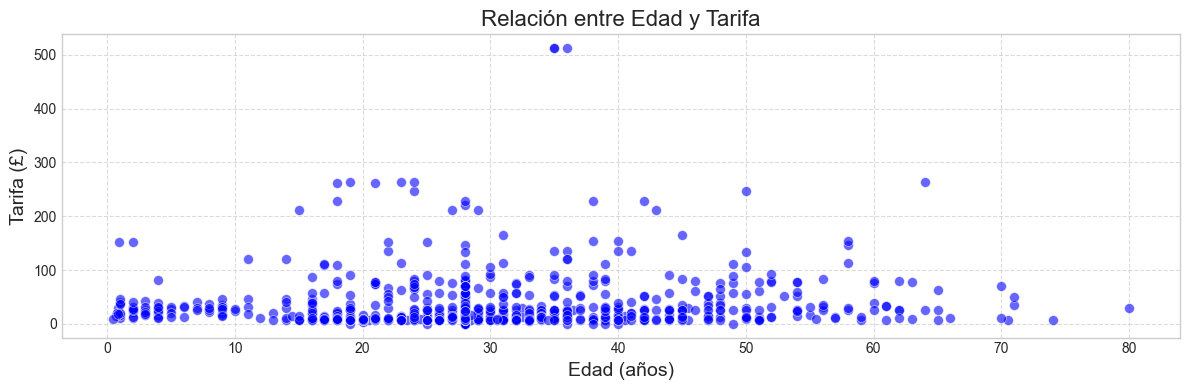

In [12]:
plt.figure(figsize=(12, 4))

# Crear el gráfico de dispersión
plt.scatter(df['Age'], df['Fare'], 
            c='blue', alpha=0.6, edgecolors='w', linewidth=0.5, s=50)

# Añadir títulos y etiquetas
plt.title('Relación entre Edad y Tarifa', fontsize=16)
plt.xlabel('Edad (años)', fontsize=14)
plt.ylabel('Tarifa (£)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

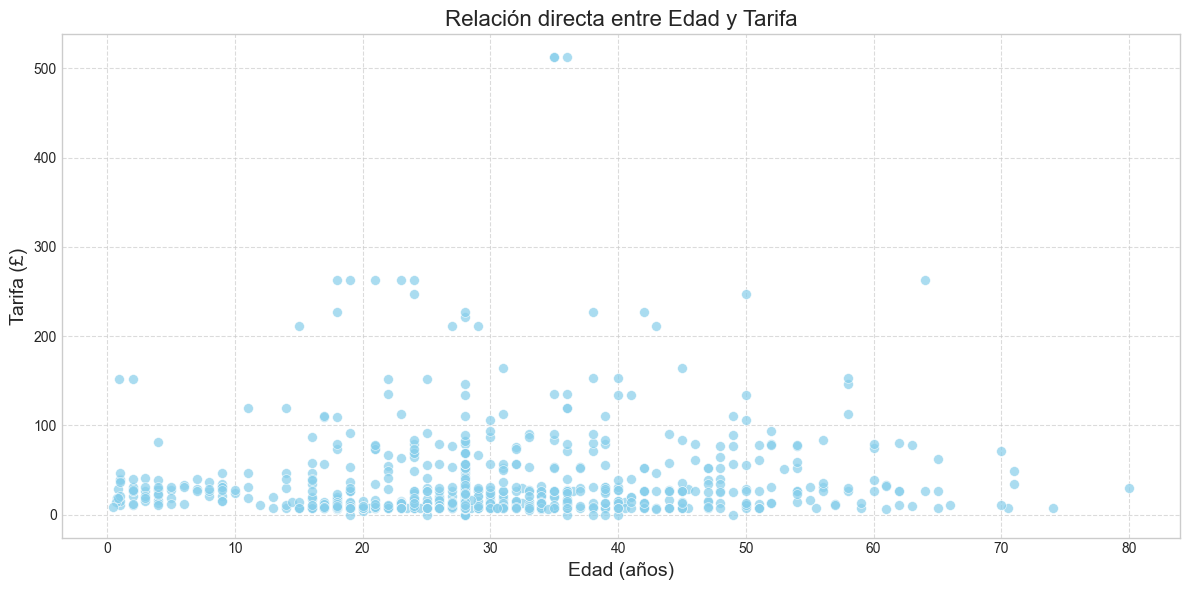

In [13]:
# Crear un gráfico de dispersión simple
plt.figure(figsize=(12, 6))

# Crear el gráfico de dispersión
plt.scatter(df['Age'], df['Fare'], 
            color='skyblue', alpha=0.7, edgecolors='w', linewidth=0.5, s=50)

# Añadir títulos y etiquetas
plt.title('Relación directa entre Edad y Tarifa', fontsize=16)
plt.xlabel('Edad (años)', fontsize=14)
plt.ylabel('Tarifa (£)', fontsize=14)

# Añadir una cuadrícula
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

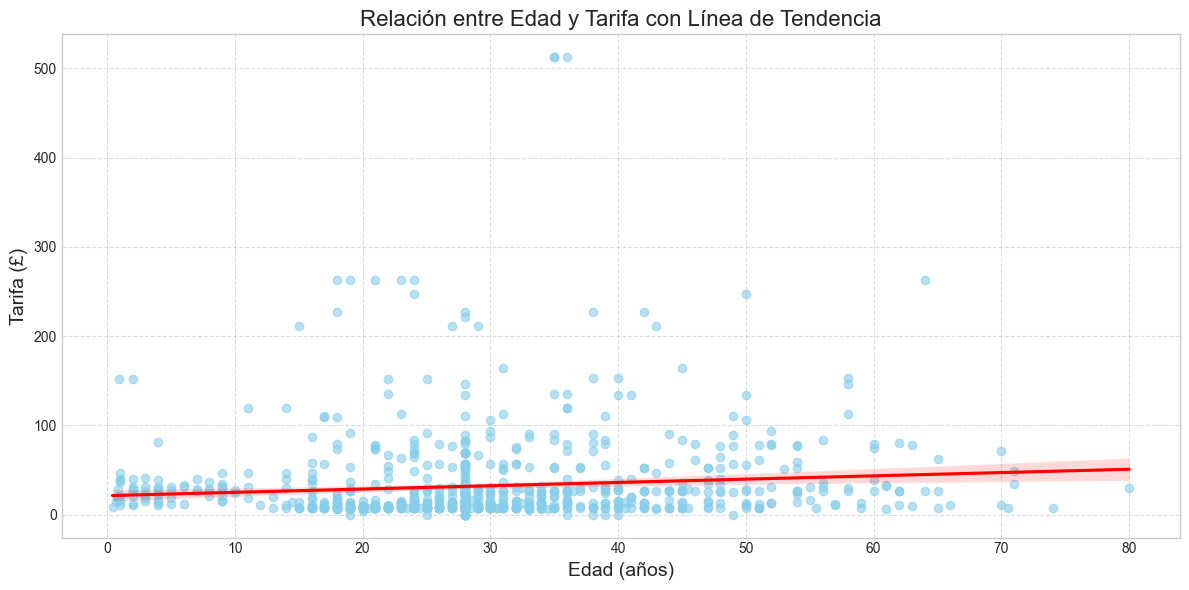

In [14]:
# Crear el gráfico de regresión
plt.figure(figsize=(12, 6))
sns.regplot(x='Age', y='Fare', data=df, scatter_kws={'alpha': 0.6, 'color': 'skyblue'}, line_kws={'color': 'red'})

# Añadir títulos y etiquetas
plt.title('Relación entre Edad y Tarifa con Línea de Tendencia', fontsize=16)
plt.xlabel('Edad (años)', fontsize=14)
plt.ylabel('Tarifa (£)', fontsize=14)

# Añadir una cuadrícula
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_29452\1431304673.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AgeGroup', y='Fare', data=df, palette='Set2', showfliers=False)  # Boxplot sin outliers


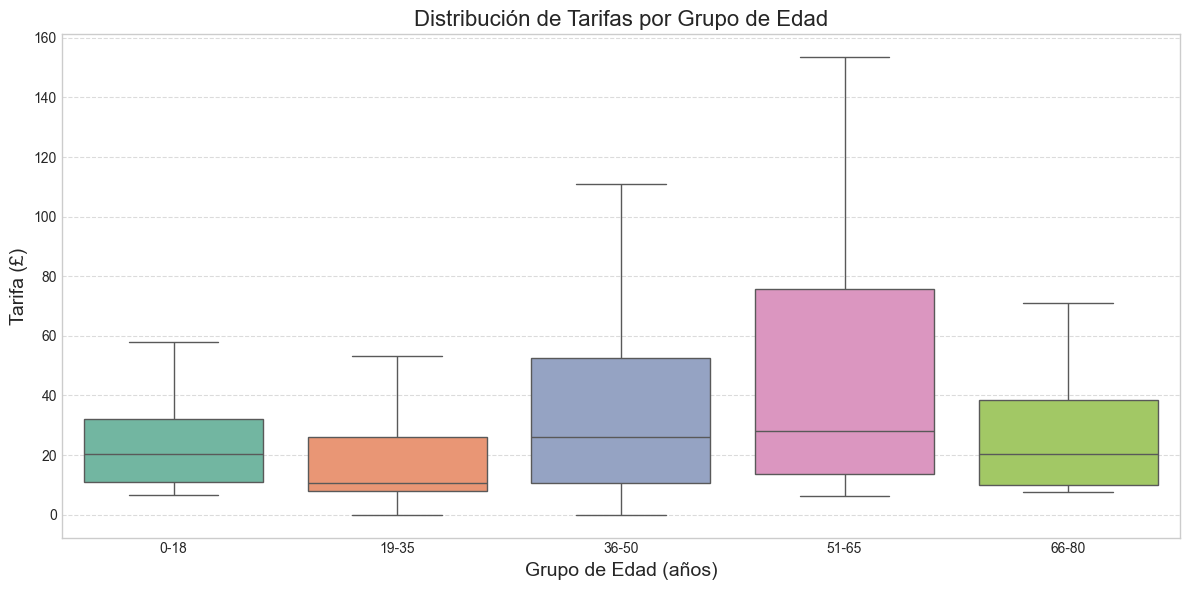

In [15]:

# Crear una nueva columna para agrupar edades en rangos
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 18, 35, 50, 65, 80], labels=['0-18', '19-35', '36-50', '51-65', '66-80'])

# Crear el gráfico combinado
plt.figure(figsize=(12, 6))
sns.boxplot(x='AgeGroup', y='Fare', data=df, palette='Set2', showfliers=False)  # Boxplot sin outliers

# Añadir títulos y etiquetas
plt.title('Distribución de Tarifas por Grupo de Edad', fontsize=16)
plt.xlabel('Grupo de Edad (años)', fontsize=14)
plt.ylabel('Tarifa (£)', fontsize=14)

# Añadir una cuadrícula
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### Correlacion

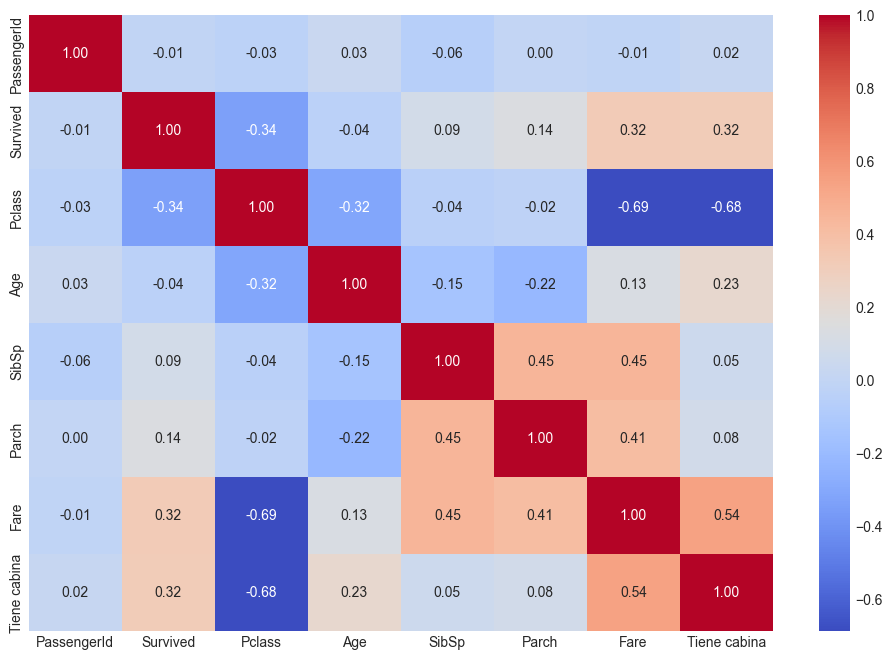

In [16]:
corr_matrix = df.select_dtypes(include=[np.number]).corr(method='spearman')
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

<Axes: >

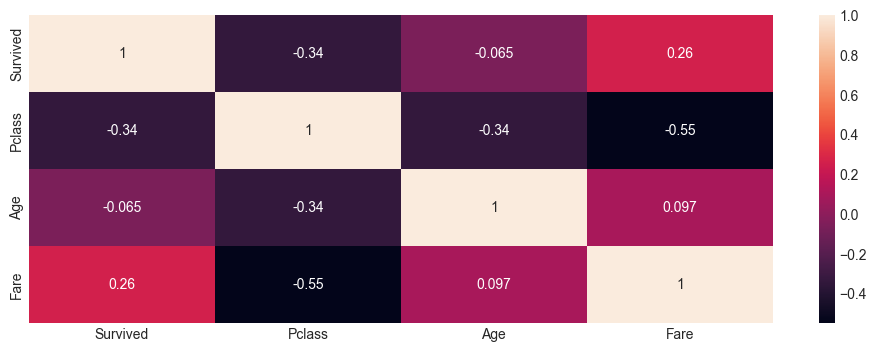

In [17]:
correlaciones = df[['Survived', 'Pclass', 'Age' , 'Fare']]
sns.heatmap(correlaciones.corr(), annot=True)

### Boxplot 

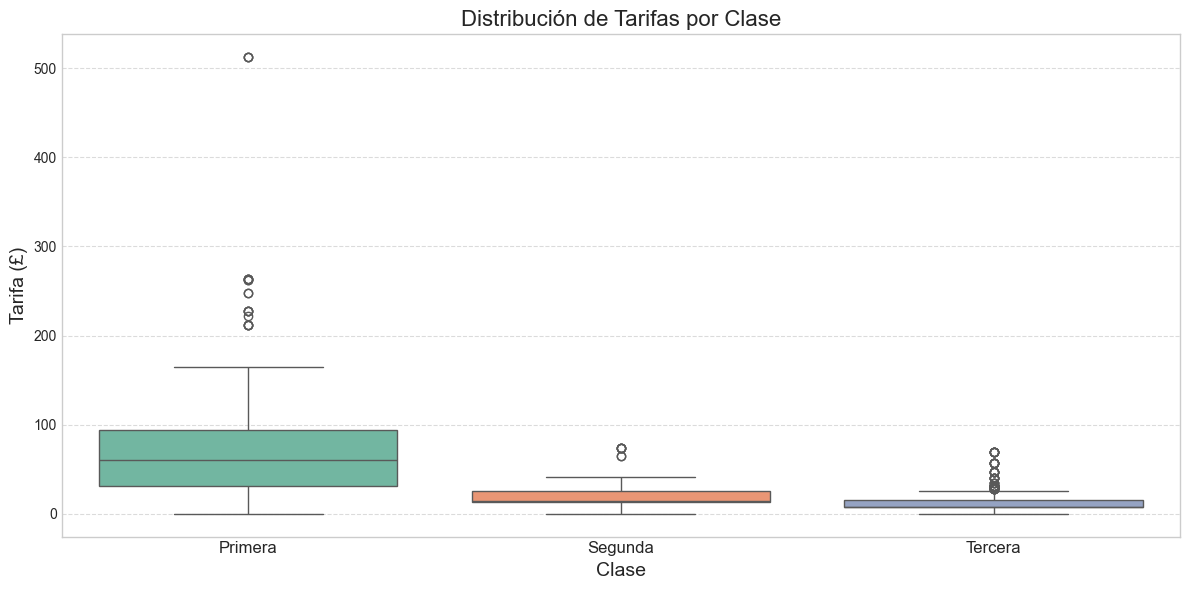

In [18]:
# Crea un boxplot para visualizar la distribución de las tarifas por clase
plt.figure(figsize=(12, 6))
sns.boxplot(x='Pclass', y='Fare', hue='Pclass', data=df, palette='Set2', dodge=False, legend=False)
plt.title('Distribución de Tarifas por Clase', fontsize=16)
plt.xlabel('Clase', fontsize=14)
plt.ylabel('Tarifa (£)', fontsize=14)
plt.xticks([0, 1, 2], ['Primera', 'Segunda', 'Tercera'], fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()  # Mostrar el gráfico

### Seaborn

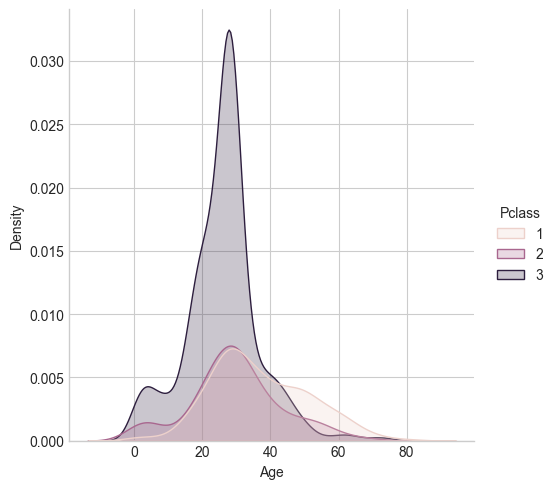

In [19]:
sns.displot(
    df, 
    x="Age",
    hue="Pclass",
    kind="kde",
    fill=True,)

<Axes: xlabel='Age', ylabel='Fare'>

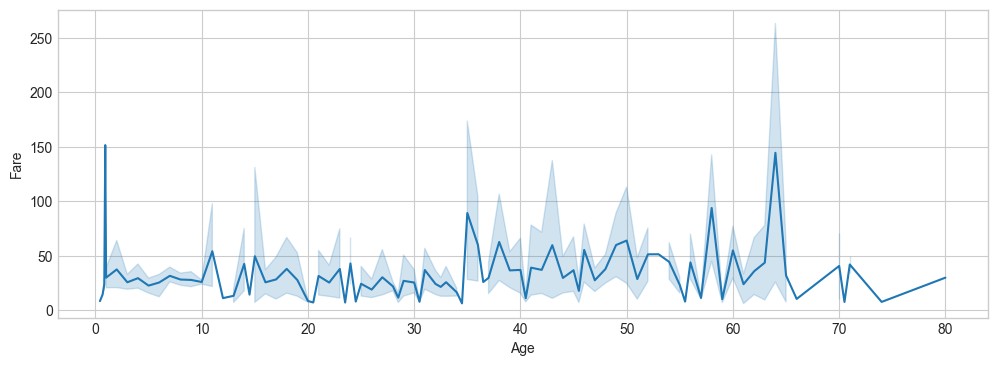

In [20]:
sns.lineplot(
    data=df, 
    x="Age", 
    y="Fare", 

)

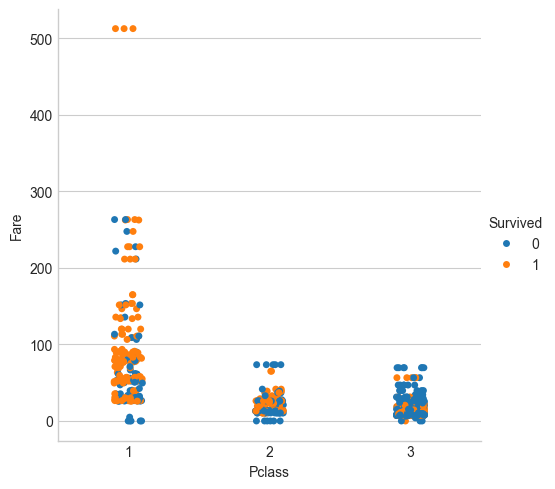

In [21]:
sns.catplot(data = df, x = 'Pclass', y = 'Fare', hue = 'Survived')

<Axes: xlabel='Pclass', ylabel='Fare'>

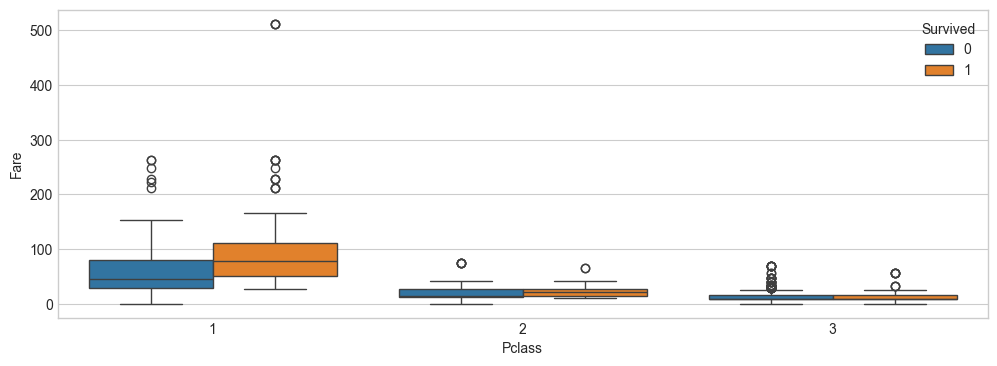

In [22]:
sns.boxplot(data = df, x = 'Pclass', y = 'Fare', hue = 'Survived')

<Axes: xlabel='Pclass', ylabel='Survived'>

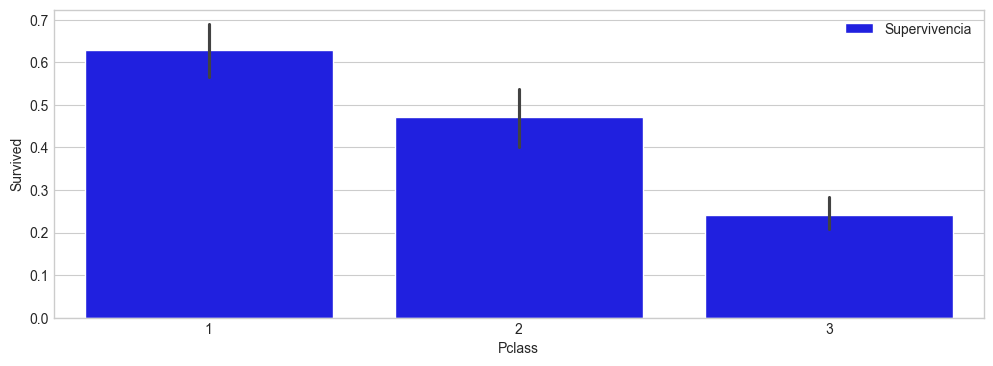

In [23]:
sns.barplot(x="Pclass", y="Survived", data=df, 
            label="Supervivencia", color="b")

In [24]:
df2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

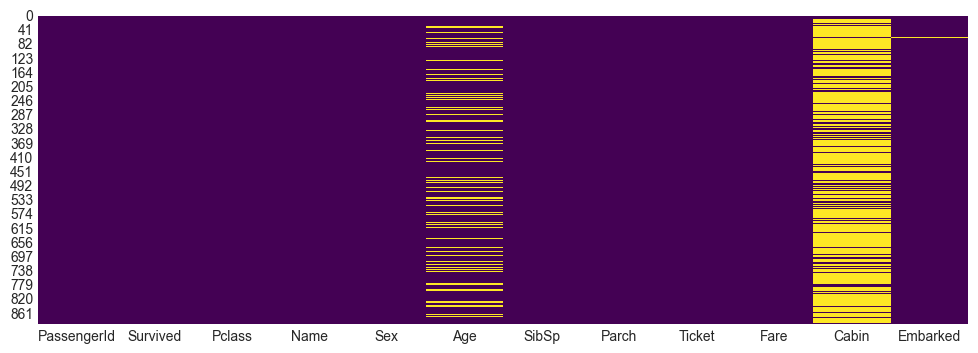

In [25]:
sns.heatmap(df2.isnull(), cbar=False, cmap='viridis')

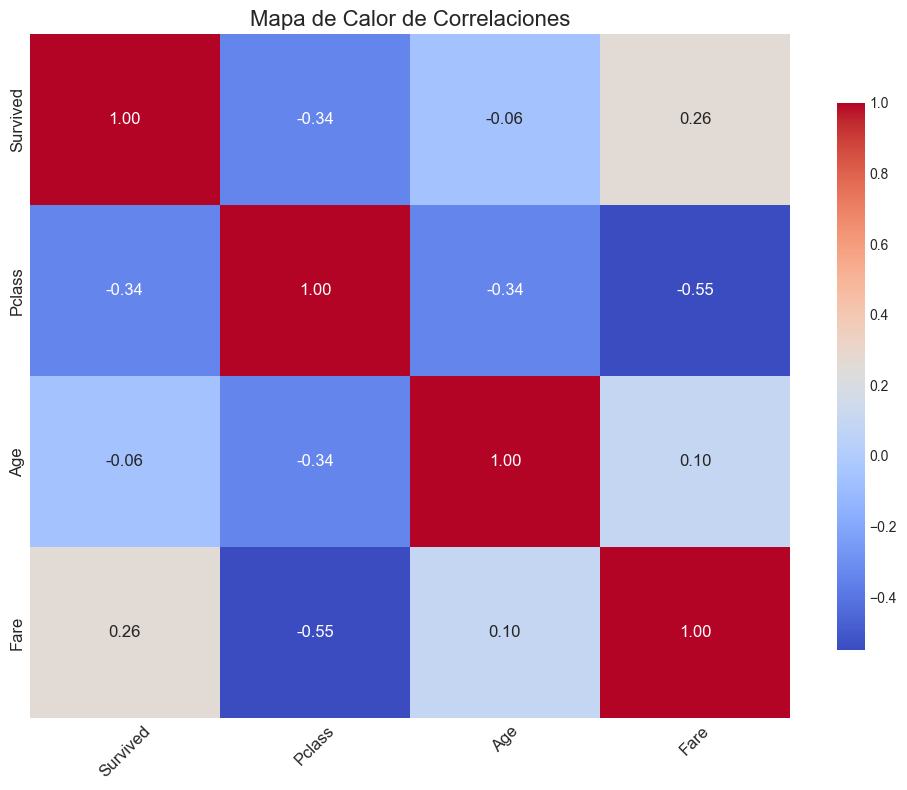

In [26]:
plt.figure(figsize=(10, 8))  # Ajustar el tamaño de la figura
sns.heatmap(
    correlaciones.corr(), 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm",  # Esquema de colores más atractivo
    annot_kws={"size": 12},  # Tamaño de las anotaciones
    cbar_kws={"shrink": 0.8}  # Ajustar el tamaño de la barra de color
)
plt.title("Mapa de Calor de Correlaciones", fontsize=16)  # Título más descriptivo
plt.xticks(rotation=45, fontsize=12)  # Rotar etiquetas del eje x
plt.yticks(fontsize=12)  # Ajustar tamaño de etiquetas del eje y
plt.tight_layout()  # Ajustar el diseño para evitar solapamientos
plt.show()

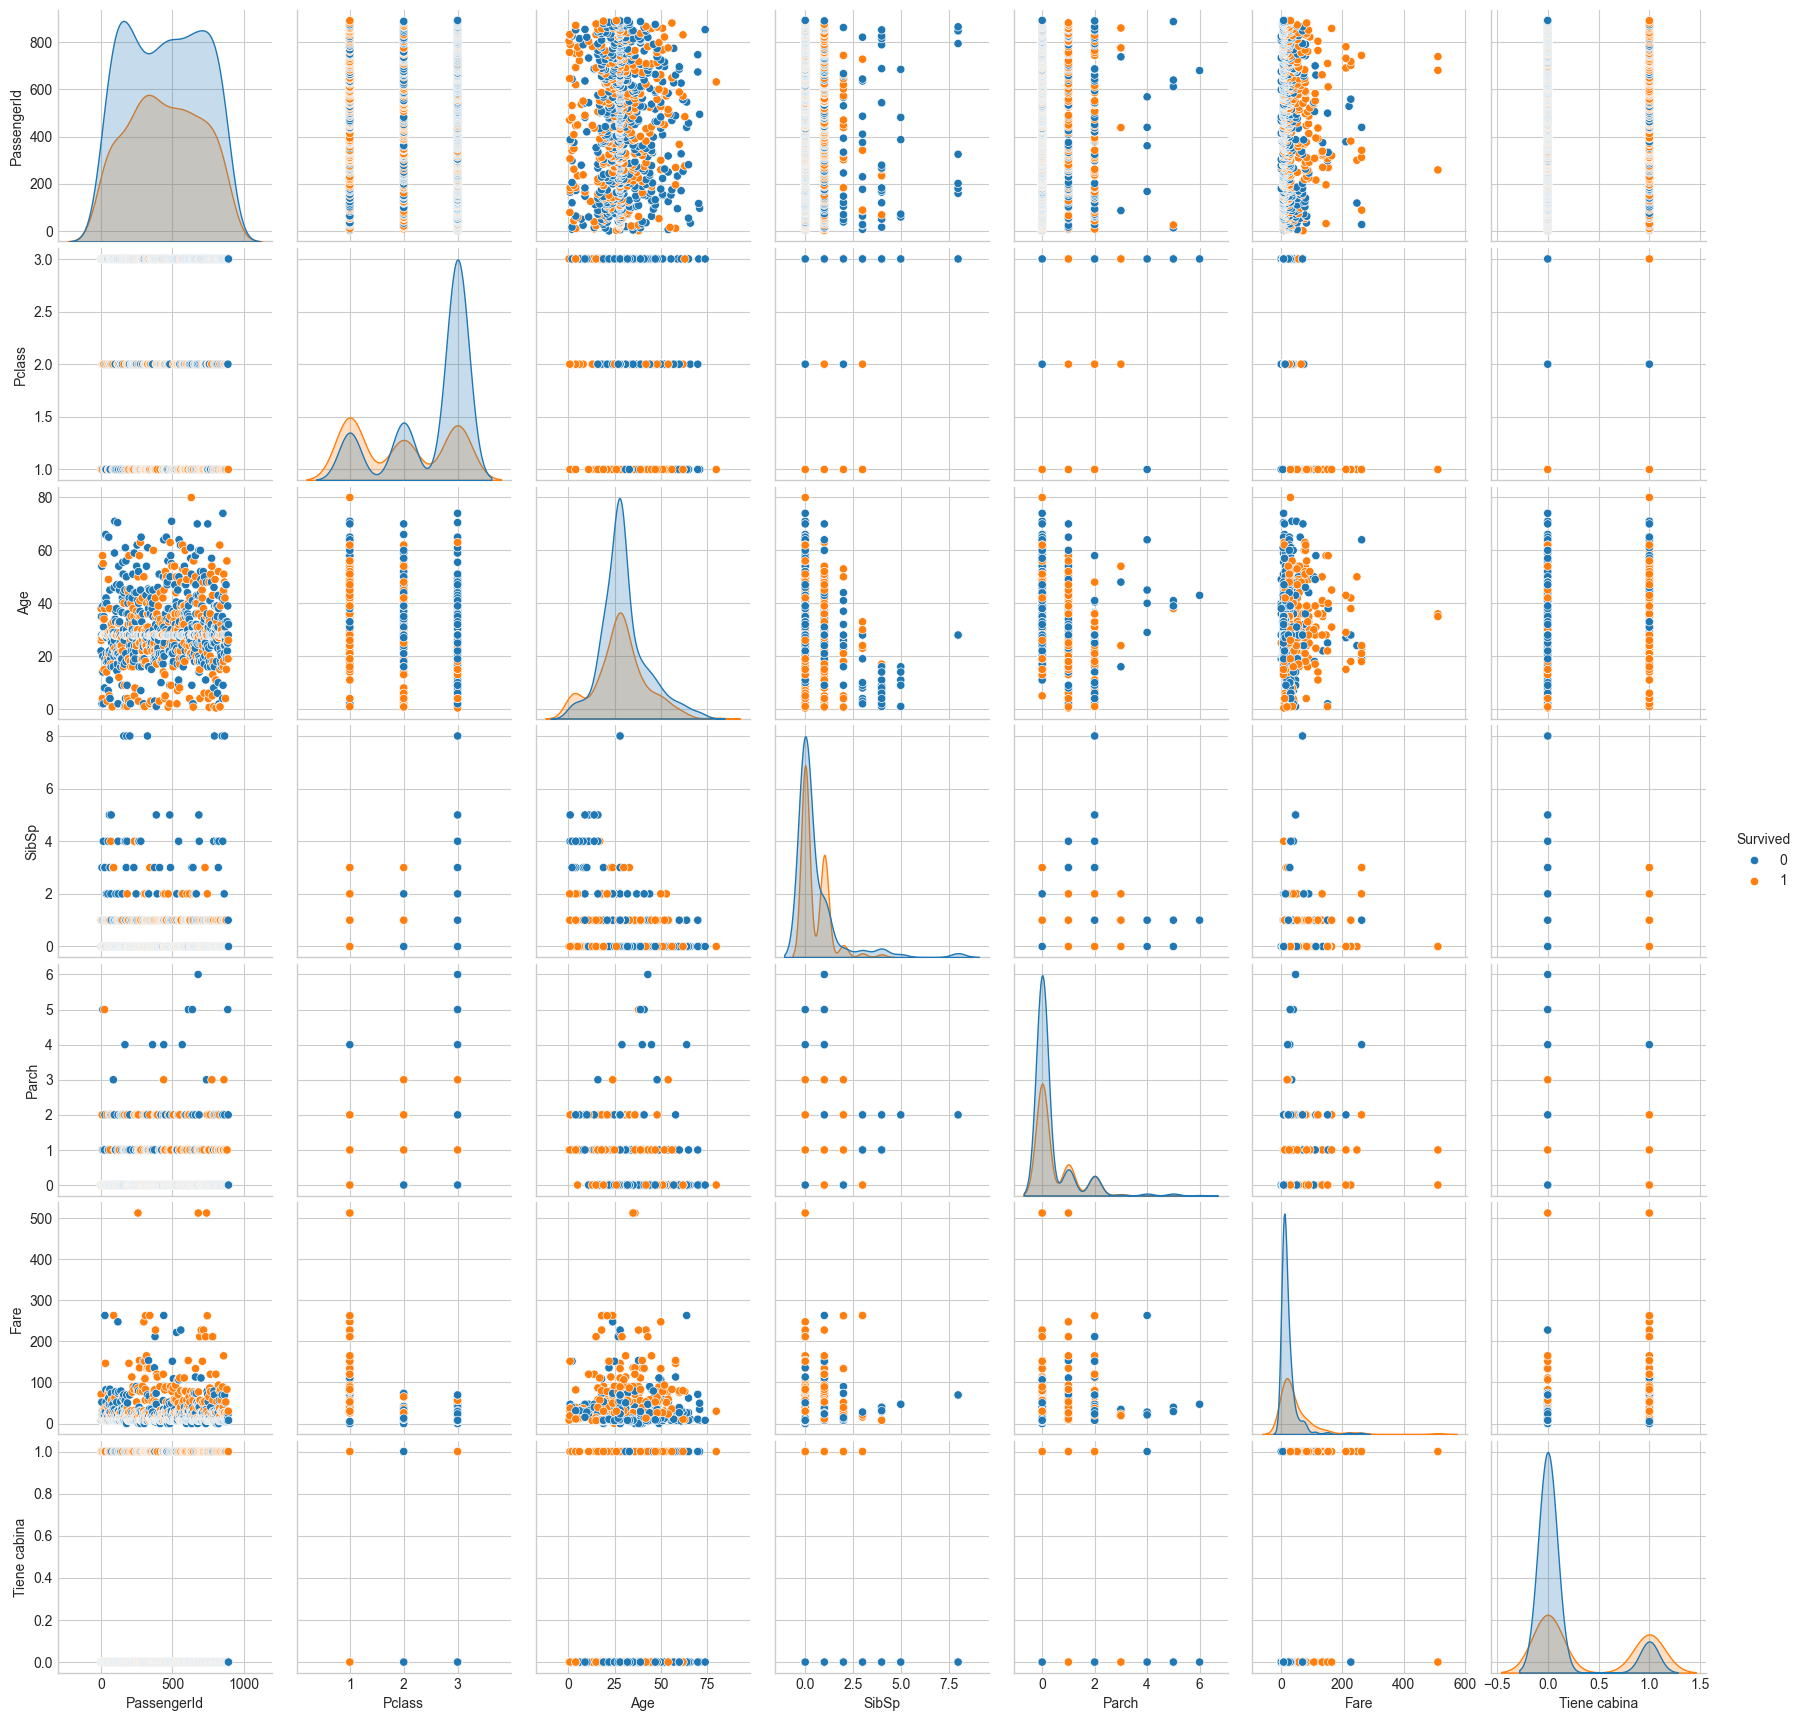

In [27]:
sns.pairplot(df, hue='Survived')

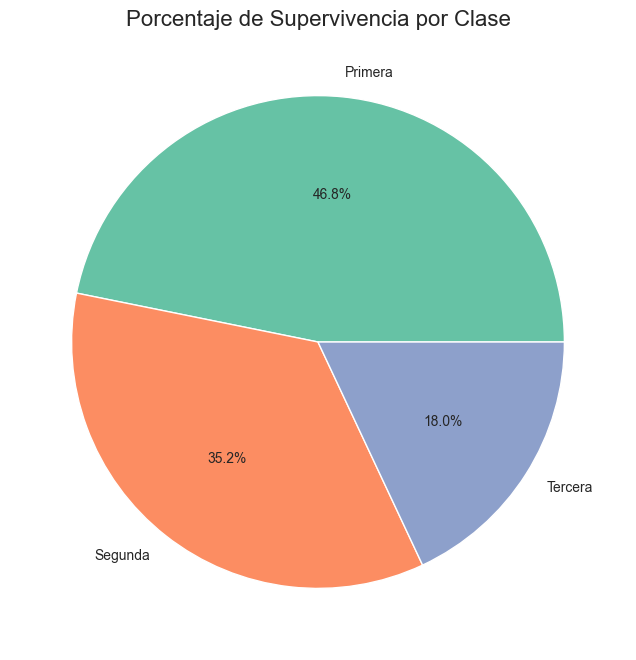

In [29]:
#crea un grafico pie con seaborn
# Crear un gráfico de pastel utilizando matplotlib, ya que seaborn no tiene soporte directo para gráficos de pastel
supervivencia_por_clase = df.groupby('Pclass')['Survived'].mean() * 100

plt.figure(figsize=(8, 8))
plt.pie(supervivencia_por_clase, labels=['Primera', 'Segunda', 'Tercera'], autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Porcentaje de Supervivencia por Clase', fontsize=16)
plt.show()

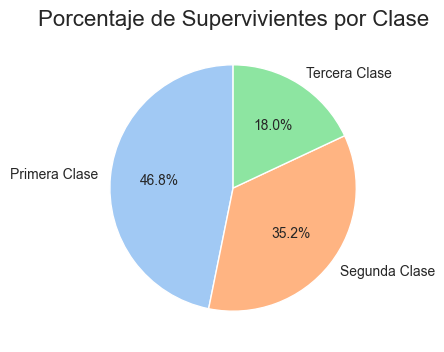

In [30]:
# Definir datos y etiquetas
data = supervientes_por_clase.values
labels = ['Primera Clase', 'Segunda Clase', 'Tercera Clase']

# Definir la paleta de colores de Seaborn
colors = sns.color_palette('pastel')[0:3]

# Crear el gráfico de pastel
plt.pie(data, labels=labels, colors=colors, autopct='%.1f%%', startangle=90)
plt.title('Porcentaje de Supervivientes por Clase', fontsize=16)
plt.show()

### plotly express

In [31]:
px.pie(df, values='Survived', names='Pclass', template='plotly_dark')

In [32]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Tiene cabina',
       'AgeGroup'],
      dtype='object')

In [33]:
px.bar(df , x='Sex' , y= 'Survived', template='plotly_dark')

In [34]:
px.scatter(df, x='Age', y='Fare', color='Survived', template='plotly_dark', size='Pclass')

In [35]:
px.scatter_3d(df, x='Age', y='Fare', z='Pclass', color='Survived', template='plotly_dark')

In [36]:
px.area(df, x="Sex", y="Fare", color="Survived", line_group="Sex", template="plotly_dark")